<a href="https://colab.research.google.com/github/manojkhara/data-science-lab/blob/main/week-10/1%20Time_Series_Analysis_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas functions for Time Series data

- Date Time Index
- Time Resampling
- Time Shifting
- Simple Moving Average (Rolling)
- Expanding
- Plotting

In [ ]:
import pandas as pd
from datetime import datetime

# Date Time Index

In [ ]:
my_dates = ["04/07/2025","05/07/2025","06/07/2025"]
my_dates

['04/07/2025', '05/07/2025', '06/07/2025']

In [ ]:
a= pd.to_datetime(my_dates, format="%d/%m/%Y")
a

DatetimeIndex(['2025-07-04', '2025-07-05', '2025-07-06'], dtype='datetime64[ns]', freq=None)

In [ ]:
a.month

Index([7, 7, 7], dtype='int32')

In [ ]:
a.day

Index([4, 5, 6], dtype='int32')

In [ ]:
a.year

Index([2025, 2025, 2025], dtype='int32')

In [ ]:
a.hour

Index([0, 0, 0], dtype='int32')

In [ ]:
datetime.strptime('31/01/22 23:59:59.999999','%d/%m/%y %H:%M:%S.%f')

NameError: name 'datetime' is not defined

In [ ]:
import gdown
# https://drive.google.com/file/d/1ugXf9514sOZx5izMY7Mt6_HX8doCQLcO/view?usp=sharing
gdown.download("https://drive.google.com/uc?id=1ugXf9514sOZx5izMY7Mt6_HX8doCQLcO")

Downloading...
From: https://drive.google.com/uc?id=1ugXf9514sOZx5izMY7Mt6_HX8doCQLcO
To: /content/Preprocessing3.csv
100%|██████████| 919k/919k [00:00<00:00, 78.0MB/s]


'Preprocessing3.csv'

In [ ]:
df = pd.read_csv("/content/Preprocessing3.csv")
df.head()

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009-01-02,2009,Greenwich,NaN,5187000.0,?,Detached House,3,2,1026.0,1.025953,South
1,2009-01-02,2009,Norwalk,NaN,480000.0,Single Family,Detached House,3,2,1051.0,1.025953,West
2,2009-01-02,2009,Waterbury,57890.0,152000.0,Single Family,Detached House,3,2,943.0,1.025953,East
3,2009-01-02,2009,NaN,44520.0,60000.0,Single Family,Detached House,3,2,1099.0,1.025953,North
4,2009-01-03,2009,Bridgeport,91071.0,250000.0,Two Family,Duplex,4,2,1213.0,1.025953,South


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Year               10000 non-null  int64  
 2   Locality           8715 non-null   object 
 3   Estimated Value    8719 non-null   float64
 4   Sale Price         10000 non-null  float64
 5   Property           10000 non-null  object 
 6   Residential        10000 non-null  object 
 7   num_rooms          10000 non-null  int64  
 8   num_bathrooms      10000 non-null  int64  
 9   carpet_area        8718 non-null   float64
 10  property_tax_rate  10000 non-null  float64
 11  Face               10000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 937.6+ KB


In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df['Date'].max()

Timestamp('2022-09-30 00:00:00')

In [ ]:
df["Date"].min()

Timestamp('2009-01-02 00:00:00')

In [ ]:
df["Date"].dt.day

,Date
0,2
1,2
2,2
3,2
4,3
...,...
9995,30
9996,30
9997,30
9998,30


# take date feature and extract day month year from that

In [ ]:
new_df = pd.DataFrame(df["Date"])
new_df.head()

,Date
0,2009-01-02
1,2009-01-02
2,2009-01-02
3,2009-01-02
4,2009-01-03


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.3 KB


In [ ]:
new_df["day"] = new_df["Date"].dt.day
new_df["month"] = new_df["Date"].dt.month
new_df["year"] = new_df["Date"].dt.year
new_df

,Date,day,month,year
0,2009-01-02,2,1,2009
1,2009-01-02,2,1,2009
2,2009-01-02,2,1,2009
3,2009-01-02,2,1,2009
4,2009-01-03,3,1,2009
...,...,...,...,...
9995,2022-09-30,30,9,2022
9996,2022-09-30,30,9,2022
9997,2022-09-30,30,9,2022
9998,2022-09-30,30,9,2022


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
import yfinance as yf
ticker_symbol = 'RELIANCE.NS'
stock_data = yf.download(ticker_symbol, start='2024-01-01', end='2025-08-01', interval="1d")
stock_data

/tmp/ipython-input-65770057.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker_symbol, start='2024-01-01', end='2025-08-01', interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2024-01-01,1290.744263,1299.016237,1282.223134,1285.910692,4030540
2024-01-02,1301.432983,1303.077427,1282.148458,1288.128164,7448800
2024-01-03,1287.281006,1312.545235,1284.241274,1300.585825,9037536
2024-01-04,1293.933350,1300.511122,1285.188128,1289.623028,9612778
2024-01-05,1299.439697,1305.494222,1294.606127,1297.047791,8086406
...,...,...,...,...,...
2025-07-25,1391.699951,1401.000000,1384.099976,1398.900024,11854722
2025-07-28,1387.599976,1407.800049,1385.000000,1392.300049,7748361


In [ ]:
import yfinance as yf
ticker_symbol = 'RELIANCE.NS'
stock_data = yf.download(ticker_symbol, period="3mo", interval="1d")
stock_data

/tmp/ipython-input-1785857247.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-05-02,1419.800049,1426.699951,1409.099976,1414.000000,13007841
2025-05-05,1431.300049,1439.500000,1426.900024,1431.000000,12685649
2025-05-06,1420.900024,1432.000000,1410.599976,1431.000000,14084117
2025-05-07,1406.000000,1424.400024,1402.699951,1420.900024,13440169
2025-05-08,1407.000000,1420.800049,1398.000000,1404.099976,16106175
...,...,...,...,...,...
2025-07-28,1387.599976,1407.800049,1385.000000,1392.300049,7748361
2025-07-29,1417.099976,1420.199951,1383.000000,1383.000000,10750072


<Axes: xlabel='Date'>

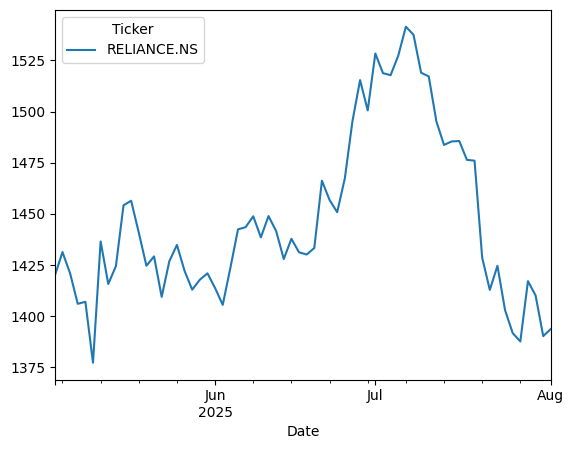

In [ ]:
stock_data["Close"].plot()

In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# Download stock data
ticker_symbol = 'RELIANCE.NS'
stock_data = yf.download(ticker_symbol, period="3mo", interval="1d")
stock_data

/tmp/ipython-input-3328782981.py:7: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2025-05-02,1419.800049,1426.699951,1409.099976,1414.000000,13007841
2025-05-05,1431.300049,1439.500000,1426.900024,1431.000000,12685649
2025-05-06,1420.900024,1432.000000,1410.599976,1431.000000,14084117
2025-05-07,1406.000000,1424.400024,1402.699951,1420.900024,13440169
2025-05-08,1407.000000,1420.800049,1398.000000,1404.099976,16106175
...,...,...,...,...,...
2025-07-28,1387.599976,1407.800049,1385.000000,1392.300049,7748361
2025-07-29,1417.099976,1420.199951,1383.000000,1383.000000,10750072


In [ ]:
stock_data.isna().sum()

,,0
Price,Ticker,
Close,RELIANCE.NS,0
High,RELIANCE.NS,0
Low,RELIANCE.NS,0
Open,RELIANCE.NS,0
Volume,RELIANCE.NS,0


In [ ]:
stock_data.index

DatetimeIndex(['2025-05-02', '2025-05-05', '2025-05-06', '2025-05-07',
               '2025-05-08', '2025-05-09', '2025-05-12', '2025-05-13',
               '2025-05-14', '2025-05-15', '2025-05-16', '2025-05-19',
               '2025-05-20', '2025-05-21', '2025-05-22', '2025-05-23',
               '2025-05-26', '2025-05-27', '2025-05-28', '2025-05-29',
               '2025-05-30', '2025-06-02', '2025-06-03', '2025-06-04',
               '2025-06-05', '2025-06-06', '2025-06-09', '2025-06-10',
               '2025-06-11', '2025-06-12', '2025-06-13', '2025-06-16',
               '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20',
               '2025-06-23', '2025-06-24', '2025-06-25', '2025-06-26',
               '2025-06-27', '2025-06-30', '2025-07-01', '2025-07-02',
               '2025-07-03', '2025-07-04', '2025-07-07', '2025-07-08',
               '2025-07-09', '2025-07-10', '2025-07-11', '2025-07-14',
               '2025-07-15', '2025-07-16', '2025-07-17', '2025-07-18',
      

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 66 entries, 2025-05-02 to 2025-08-01
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, RELIANCE.NS)   66 non-null     float64
 1   (High, RELIANCE.NS)    66 non-null     float64
 2   (Low, RELIANCE.NS)     66 non-null     float64
 3   (Open, RELIANCE.NS)    66 non-null     float64
 4   (Volume, RELIANCE.NS)  66 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 3.1 KB


In [ ]:
stock_data.columns =stock_data.columns.droplevel("Ticker")


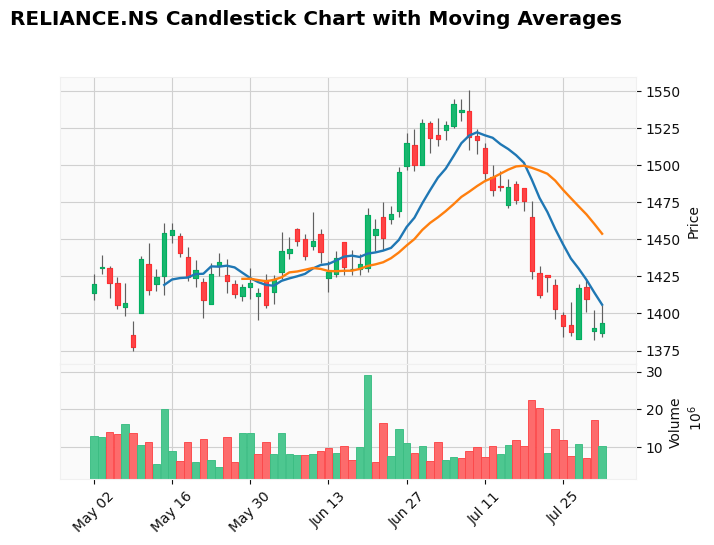

In [ ]:
# Plot candlestick chart with 10-day and 20-day moving averages
mpf.plot(
    stock_data,
    type='candle',
    style='yahoo',
    title=f'{ticker_symbol} Candlestick Chart with Moving Averages',
    mav=(10, 20),
    volume=True,
    ylabel='Price',
    ylabel_lower='Volume'
)


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=stock_data.index,
                open=stock_data['Open'],
                high=stock_data['High'],
                low=stock_data['Low'],
                close=stock_data['Close'])])

fig.update_layout(title='Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()